#### Draw time series

In [1]:
# Imports
import os
import numpy as np
import nibabel as nb
import pandas as pd
import scipy
import warnings
warnings.filterwarnings('ignore')

# Figure imports
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.express as px
from plot_utils import plotly_template

# pRFpy
from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter

# Define folders
base_dir = '/home/mszinte/disks/meso_S/data/gaze_prf'
#base_dir = '/Users/martinszinte/Desktop/gaze_prf/'
bids_dir = "{}".format(base_dir)
pp_dir = "{}/derivatives/pp_data".format(base_dir)
vdm_dir = "{}/derivatives/visual_dm".format(base_dir)

# settings
TR = 1.3
screen_distance_cm = 225
screen_size_cm = 69.8
gaze_shift = 4.0
resize_par = 9
cortical_mask = 'cortical'
best_voxels_num = 250
subjects = ['sub-001', 'sub-002', 'sub-003', 'sub-004',
            'sub-005', 'sub-006', 'sub-007', 'sub-008']

rois = ['V1', 'V2', 'V3', 'V3AB', 'hMT+', 'LO',
        'VO', 'iIPS', 'sIPS', 'iPCS', 'sPCS', 'mPCS']


# Fullscreen visual design
visual_dm_file_fs = scipy.io.loadmat("{}/FullScreen_vd.mat".format(vdm_dir))
visual_dm_fs = visual_dm_file_fs['stim'].transpose([1,0,2])
stimulus_fs = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_fs, TR=TR)
gauss_model_fs = Iso2DGaussianModel(stimulus=stimulus_fs, 
                                    normalize_RFs=False)
# Gaze conditions visual design
visual_dm_file_gaze = scipy.io.loadmat("{}/GazeCenter_vd.mat".format(vdm_dir))
visual_dm_gaze = visual_dm_file_gaze['stim'].transpose([1,0,2])
stimulus_gaze = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_gaze, TR=TR)
gauss_model_gaze = Iso2DGaussianModel(stimulus=stimulus_gaze, normalize_RFs=False)


# General figure settings
template_specs = dict(  axes_color="rgba(0, 0, 0, 1)",
                        axes_width=2,
                        axes_font_size=13,
                        bg_col="rgba(255, 255, 255, 1)",
                        font='Arial',
                        title_font_size=15,
                        plot_width=1.5)
fig_template = plotly_template(template_specs)

In [2]:
# for subject_num, subject in enumerate(subjects):
subject_num = 0
subject = 'sub-001'

# define folders
fit_dir = '{}/{}/prf/fit'.format(pp_dir, subject)
fit_dir = '{}/{}/prf/fit'.format(pp_dir, subject)
func_avg_dir = '{}/{}/func_avg'.format(pp_dir, subject)
mask_dir = '{}/{}/masks'.format(pp_dir, subject)
tsv_dir = '{}/{}/prf/tsv'.format(pp_dir, subject)

try: os.makedirs(tsv_dir)
except: pass

# load pRF threshold masks
th_mat = nb.load('{}/{}_task-FullScreen_prf_threshold.nii.gz'.format(mask_dir,subject)).get_fdata()

# load fit parameters [x] by threshold
fs_r2_th_mat = nb.load('{}/{}_task-FullScreen_par-r2.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ecc_th_mat = nb.load('{}/{}_task-FullScreen_par-ecc.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_sd_th_mat = nb.load('{}/{}_task-FullScreen_par-sd.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_x_th_mat = nb.load('{}/{}_task-FullScreen_par-x.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_y_th_mat = nb.load('{}/{}_task-FullScreen_par-y.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_amp_th_mat = nb.load('{}/{}_task-FullScreen_par-amplitude.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat/resize_par
fs_bsl_th_mat = nb.load('{}/{}_task-FullScreen_par-baseline.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat

fs_ab_r2_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-r2.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ab_ecc_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-ecc.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ab_sd_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-sd.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ab_x_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-x.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ab_y_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-y.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_ab_amp_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-amplitude.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat/resize_par
fs_ab_bsl_th_mat = nb.load('{}/{}_task-FullScreenAttendBar_par-baseline.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat

fs_af_r2_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-r2.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_af_ecc_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-ecc.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_af_sd_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-sd.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_af_x_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-x.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_af_y_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-y.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat
fs_af_amp_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-amplitude.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat/resize_par
fs_af_bsl_th_mat = nb.load('{}/{}_task-FullScreenAttendFix_par-baseline.nii.gz'.format(fit_dir,subject)).get_fdata()*th_mat

# Load time series
fs_ts = nb.load('{}/{}_task-FullScreen_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()

fs_ab_ts = nb.load('{}/{}_task-FullScreenAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gc_ab_ts = nb.load('{}/{}_task-GazeCenterAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gl_ab_ts = nb.load('{}/{}_task-GazeLeftAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gr_ab_ts = nb.load('{}/{}_task-GazeRightAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()

fs_af_ts = nb.load('{}/{}_task-FullScreenAttendFix_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gc_af_ts = nb.load('{}/{}_task-GazeCenterAttendFix_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gl_af_ts = nb.load('{}/{}_task-GazeLeftAttendFix_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()
gr_af_ts = nb.load('{}/{}_task-GazeRightAttendFix_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject)).get_fdata()


In [3]:
# creat tsv
for roi_num, roi in enumerate(rois):
    # load roi
    lh_mat = nb.load("{}/{}_{}_L.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    rh_mat = nb.load("{}/{}_{}_R.nii.gz".format(mask_dir, roi, cortical_mask)).get_fdata()
    roi_mat = lh_mat + rh_mat
    roi_mat[roi_mat==0] = np.nan

    # create dataframe
    df_roi = pd.DataFrame({'roi': [roi] * fs_r2_th_mat[roi_mat==True].shape[0]})
    df_roi['r2_fs'] = fs_r2_th_mat[roi_mat==True]
    df_roi['ecc_fs'] = fs_ecc_th_mat[roi_mat==True]
    df_roi['sd_fs'] = fs_sd_th_mat[roi_mat==True]
    df_roi['x_fs'] = fs_x_th_mat[roi_mat==True]
    df_roi['y_fs'] = fs_y_th_mat[roi_mat==True]
    df_roi['amp_fs'] = fs_amp_th_mat[roi_mat==True]
    df_roi['bsl_fs'] = fs_bsl_th_mat[roi_mat==True]
    df_roi['r2_fs_ab'] = fs_ab_r2_th_mat[roi_mat==True]
    df_roi['ecc_fs_ab'] = fs_ab_ecc_th_mat[roi_mat==True]
    df_roi['sd_fs_ab'] = fs_ab_sd_th_mat[roi_mat==True]
    df_roi['x_fs_ab'] = fs_ab_x_th_mat[roi_mat==True]
    df_roi['y_fs_ab'] = fs_ab_y_th_mat[roi_mat==True]
    df_roi['amp_fs_ab'] = fs_ab_amp_th_mat[roi_mat==True]
    df_roi['bsl_fs_ab'] = fs_ab_bsl_th_mat[roi_mat==True]
    df_roi['r2_fs_af'] = fs_af_r2_th_mat[roi_mat==True]
    df_roi['ecc_fs_af'] = fs_af_ecc_th_mat[roi_mat==True]
    df_roi['sd_fs_af'] = fs_af_sd_th_mat[roi_mat==True]
    df_roi['x_fs_af'] = fs_af_x_th_mat[roi_mat==True]
    df_roi['y_fs_af'] = fs_af_y_th_mat[roi_mat==True]
    df_roi['amp_fs_af'] = fs_af_amp_th_mat[roi_mat==True]
    df_roi['bsl_fs_af'] = fs_af_bsl_th_mat[roi_mat==True]
    df_roi['rank_r2_fs']=df_roi.groupby('roi')['r2_fs'].rank(method='max',ascending=False)
    df_roi['time_fs'] = [np.arange(1,fs_ts.shape[3]+1)*TR]*np.sum(roi_mat==True)
    df_roi['data_fs'] = (fs_ts[roi_mat==True,:]).tolist()
    df_roi['data_fs_ab'] = (fs_ab_ts[roi_mat==True,:]).tolist()
    df_roi['data_fs_af'] = (fs_af_ts[roi_mat==True,:]).tolist()
    df_roi['time_gaze'] = [np.arange(1,gc_ab_ts.shape[3]+1)*TR]*np.sum(roi_mat==True)
    df_roi['data_gc_ab'] = (gc_ab_ts[roi_mat==True,:]).tolist()
    df_roi['data_gc_af'] = (gc_af_ts[roi_mat==True,:]).tolist()
    df_roi['data_gl_ab'] = (gl_ab_ts[roi_mat==True,:]).tolist()
    df_roi['data_gl_af'] = (gl_af_ts[roi_mat==True,:]).tolist()
    df_roi['data_gr_ab'] = (gr_ab_ts[roi_mat==True,:]).tolist()
    df_roi['data_gr_af'] = (gr_af_ts[roi_mat==True,:]).tolist()

    # keep best 250
    df_roi = df_roi[(df_roi.rank_r2_fs<=best_voxels_num)]
    
    # get model predictions
    for gaze_task in ['gc','gl','gr']:
        if gaze_task == 'gc': gaze_shift_val = 0
        elif gaze_task == 'gl': gaze_shift_val = gaze_shift
        elif gaze_task == 'gr': gaze_shift_val = -gaze_shift
            
        for attention_task in ['ab','af']:
            for model_prediction in ['retino','spatio']:
                exec("model_{}_{}_{} = np.zeros((df_roi.shape[0],visual_dm_gaze.shape[2]))".format(gaze_task,attention_task,model_prediction))

                for vox_num, vox_idx in enumerate(df_roi.index):
                      exec("model_{gaze_task}_{attention_task}_{model_prediction}[vox_num,:] = \
                           gauss_model_gaze.return_prediction( mu_x=df_roi.x_fs_{attention_task}[vox_idx] + gaze_shift_val, \
                                                               mu_y=df_roi.y_fs_{attention_task}[vox_idx], \
                                                               size=df_roi.sd_fs_{attention_task}[vox_idx], \
                                                               beta=df_roi.amp_fs_{attention_task}[vox_idx], \
                                                               baseline=df_roi.bsl_fs_{attention_task}[vox_idx])".format(  gaze_task=gaze_task,
                                                                                                                           attention_task=attention_task,
                                                                                                                           model_prediction=model_prediction))
                        
                exec("df_roi['model_{gaze_task}_{attention_task}_{model_prediction}'] = \
                      model_{gaze_task}_{attention_task}_{model_prediction}.tolist()".format(  gaze_task=gaze_task,
                                                                                               attention_task=attention_task,
                                                                                               model_prediction=model_prediction))
                
    
    
    # across roi
    if roi_num > 0: df = pd.concat([df,df_roi], ignore_index=True)
    else: df = df_roi
            
    # save df

- [ ] compute r2 for gaze conditions see pycortex
- [ ] save as tsv (see make tsv)
- [ ] put in make tsv
- [ ] load data in draw timeseries

In [ ]:
# Load time series
fs_fn = '{}/{}_task-FullScreen_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject2plot)
fs_ts = nb.load(fs_fn).get_fdata()
gc_fn = '{}/{}_task-GazeCenterAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject2plot)
gc_ts = nb.load(gc_fn).get_fdata()
gl_fn = '{}/{}_task-GazeLeftAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject2plot)
gl_ts = nb.load(gl_fn).get_fdata()
gr_fn = '{}/{}_task-GazeRightAttendBar_fmriprep_dct_avg.nii.gz'.format(func_avg_dir,subject2plot)
gr_ts = nb.load(gr_fn).get_fdata()

# Load roi mask
v1_lh_mat = nb.load("{}/V1_{}_L.nii.gz".format(mask_dir, cortical_mask)).get_fdata()
v1_rh_mat = nb.load("{}/V1_{}_R.nii.gz".format(mask_dir, cortical_mask)).get_fdata()
v1_mat = v1_lh_mat + v1_rh_mat
v1_mat[v1_mat==0] = np.nan

hmt_lh_mat = nb.load("{}/hMT+_{}_L.nii.gz".format(mask_dir, cortical_mask)).get_fdata()
hmt_rh_mat = nb.load("{}/hMT+_{}_R.nii.gz".format(mask_dir, cortical_mask)).get_fdata()
hmt_mat = hmt_lh_mat + hmt_rh_mat
hmt_mat[hmt_mat==0] = np.nan

# Load pRF threshold masks
th_mat = nb.load('{}/{}_task-FullScreen_prf_threshold.nii.gz'.format(mask_dir,subject2plot)).get_fdata()

# Combined masks
th_v1_mat = th_mat*v1_mat
th_hmt_mat = th_mat*hmt_mat

# Load fit parameters
fs_r2_mat = nb.load('{}/{}_task-FullScreen_par-r2.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_ecc_mat = nb.load('{}/{}_task-FullScreen_par-ecc.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_sd_mat = nb.load('{}/{}_task-FullScreen_par-sd.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_x_mat = nb.load('{}/{}_task-FullScreen_par-x.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_y_mat = nb.load('{}/{}_task-FullScreen_par-y.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_amp_mat = nb.load('{}/{}_task-FullScreen_par-amplitude.nii.gz'.format(fit_dir,subject2plot)).get_fdata()
fs_bsl_mat = nb.load('{}/{}_task-FullScreen_par-baseline.nii.gz'.format(fit_dir,subject2plot)).get_fdata()


In [ ]:
# create dataframe with masked data
df = pd.DataFrame({  'roi': np.hstack((['V1']*fs_r2_mat[th_v1_mat==True].shape[0],
                                       ['hMT+']*fs_r2_mat[th_hmt_mat==True].shape[0])),
                     'r2': np.hstack((fs_r2_mat[th_v1_mat==True],
                                      fs_r2_mat[th_hmt_mat==True])),
                     'ecc': np.hstack((fs_ecc_mat[th_v1_mat==True],
                                       fs_ecc_mat[th_hmt_mat==True])),
                     'sd': np.hstack((fs_sd_mat[th_v1_mat==True],
                                      fs_sd_mat[th_hmt_mat==True])),
                     'x': np.hstack((fs_x_mat[th_v1_mat==True],
                                     fs_x_mat[th_hmt_mat==True])),
                     'y': np.hstack((fs_y_mat[th_v1_mat==True],
                                     fs_y_mat[th_hmt_mat==True])),
                     'amplitude': np.hstack((fs_amp_mat[th_v1_mat==True],
                                             fs_amp_mat[th_hmt_mat==True])),
                     'baseline': np.hstack((fs_bsl_mat[th_v1_mat==True],
                                            fs_bsl_mat[th_hmt_mat==True])),
                     'time_fs': np.vstack(([np.round(np.arange(1,fs_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_v1_mat==True),
                                           [np.round(np.arange(1,fs_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_hmt_mat==True))).tolist(),
                     'data_fs_ts': np.vstack((fs_ts[th_v1_mat == True,:],
                                              fs_ts[th_hmt_mat == True,:])).tolist(),
                     'time_gc': np.vstack(([np.round(np.arange(1,gc_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_v1_mat==True),
                                           [np.round(np.arange(1,gc_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_hmt_mat==True))).tolist(),
                     'data_gc_ts': np.vstack((gc_ts[th_v1_mat == True,:],
                                              gc_ts[th_hmt_mat == True,:])).tolist(),
                     'time_gl': np.vstack(([np.round(np.arange(1,gl_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_v1_mat==True),
                                           [np.round(np.arange(1,gl_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_hmt_mat==True))).tolist(),
                     'data_gl_ts': np.vstack((gl_ts[th_v1_mat == True,:],
                                              gl_ts[th_hmt_mat == True,:])).tolist(),
                     'time_gr': np.vstack(([np.round(np.arange(1,gr_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_v1_mat==True),
                                           [np.round(np.arange(1,gr_ts.shape[3]+1)*TR,decimals=2)]*np.sum(th_hmt_mat==True))).tolist(),
                     'data_gr_ts': np.vstack((gr_ts[th_v1_mat == True,:],
                                              gr_ts[th_hmt_mat == True,:])).tolist(),
                    })

# Fullscreen
visual_dm_file_fs = scipy.io.loadmat("{}/FullScreen_vd.mat".format(vdm_dir))
visual_dm_fs = visual_dm_file_fs['stim'].transpose([1,0,2])
stimulus_fs = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_fs, TR=TR)
gauss_model_fs = Iso2DGaussianModel(stimulus=stimulus_fs, 
                                    normalize_RFs=False)
model_fs_ts = np.zeros((df.index.stop,visual_dm_fs.shape[2]))
for vox in df.index :
    model_fs_ts[vox,:] = gauss_model_fs.return_prediction(mu_x=df.x[vox], mu_y=df.y[vox], size=df.sd[vox], beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
df['model_fs_ts'] = model_fs_ts.tolist()

# Gaze Center
visual_dm_file_gc = scipy.io.loadmat("{}/GazeCenter_vd.mat".format(vdm_dir))
visual_dm_gc = visual_dm_file_gc['stim'].transpose([1,0,2])
stimulus_gc = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_gc, TR=TR)
gauss_model_gc = Iso2DGaussianModel(stimulus=stimulus_gc, normalize_RFs=False)
model_fs2gc_ts = np.zeros((df.index.stop,visual_dm_gc.shape[2]))
for vox in df.index :
    model_fs2gc_ts[vox,:] = gauss_model_gc.return_prediction(mu_x=df.x[vox], mu_y=df.y[vox], size=df.sd[vox], beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
df['model_fs2gc_ts'] = model_fs2gc_ts.tolist()

# Gaze Left
visual_dm_file_gl = scipy.io.loadmat("{}/GazeCenter_vd.mat".format(vdm_dir))
visual_dm_gl = visual_dm_file_gl['stim'].transpose([1,0,2])
stimulus_gl = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_gl, TR=TR)
gauss_model_gl = Iso2DGaussianModel(stimulus=stimulus_gl, normalize_RFs=False)
model_fs2gl_retino_ts = np.zeros((df.index.stop,visual_dm_gl.shape[2]))
model_fs2gl_spatio_ts = np.zeros((df.index.stop,visual_dm_gl.shape[2]))
for vox in df.index :
    model_fs2gl_retino_ts[vox,:] = gauss_model_gl.return_prediction(mu_x=df.x[vox], mu_y=df.y[vox], size=df.sd[vox], 
                                                                    beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
    model_fs2gl_spatio_ts[vox,:] = gauss_model_gl.return_prediction(mu_x=df.x[vox]+gaze_shift, mu_y=df.y[vox], size=df.sd[vox], 
                                                                    beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
df['model_fs2gl_retino_ts'] = model_fs2gl_retino_ts.tolist()
df['model_fs2gl_spatio_ts'] = model_fs2gl_spatio_ts.tolist()

# Gaze Right
visual_dm_file_gr = scipy.io.loadmat("{}/GazeCenter_vd.mat".format(vdm_dir))
visual_dm_gr = visual_dm_file_gr['stim'].transpose([1,0,2])
stimulus_gr = PRFStimulus2D(screen_size_cm=screen_size_cm, screen_distance_cm=screen_distance_cm, design_matrix=visual_dm_gr, TR=TR)
gauss_model_gr = Iso2DGaussianModel(stimulus=stimulus_gr, normalize_RFs=False)
model_fs2gr_retino_ts = np.zeros((df.index.stop,visual_dm_gr.shape[2]))
model_fs2gr_spatio_ts = np.zeros((df.index.stop,visual_dm_gr.shape[2]))
for vox in df.index :
    model_fs2gr_retino_ts[vox,:] = gauss_model_gr.return_prediction(mu_x=df.x[vox], mu_y=df.y[vox], size=df.sd[vox], 
                                                                    beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
    model_fs2gr_spatio_ts[vox,:] = gauss_model_gr.return_prediction(mu_x=df.x[vox]-gaze_shift, mu_y=df.y[vox], size=df.sd[vox], 
                                                                    beta=df.amplitude[vox]/9, baseline=df.baseline[vox])
df['model_fs2gr_retino_ts'] = model_fs2gr_retino_ts.tolist()
df['model_fs2gr_spatio_ts'] = model_fs2gr_spatio_ts.tolist()

In [ ]:
# select voxels
v1_df = df.loc[(df.roi=='V1') & (df.r2>0.6) & (df.sd<1.5) & (df.x<-1.5)].reset_index()
num_vox = 3


# get RF
gauss_fitter_fs = Iso2DGaussianFitter(data=model_fs_ts, 
                                      model=gauss_model_fs)
gauss_fitter_fs.grid_fit(ecc_grid=v1_df.ecc[num_vox], 
                         polar_grid=np.angle(v1_df.x[num_vox] + 1j * v1_df.y[num_vox]),
                         size_grid=v1_df.sd[num_vox])
gauss_model_fs.create_rfs()
rf = gauss_model_fs.grid_rfs[0,:,:]
rf_norm = ((rf - np.min(rf)) / (np.max(rf) - np.min(rf)))*255

# Subplot settings
rows, cols = 2, 2
margin_t, margin_b, margin_l, margin_r = 50, 50 ,50 ,50
fig_ratio = 5
fig_height = 1080/fig_ratio + (1080/fig_ratio*0.15) + margin_t+margin_b
fig_width = 1920/fig_ratio + 1920/fig_ratio + margin_l+margin_r
column_widths,row_heights = [1,1],[0.15,1]
sb_specs = [[{},{}],[{},{}]]
hover_data = 'Time: %{x:1.2f} s<br>' + 'z-score: %{y:1.2f}'
hover_model = 'Time: %{x:1.2f} s<br>' + 'z-score: %{y:1.2f}'

xaxis_range = [0,195]
yaxis_range = [-1,2]
yaxis_dtick = 1
x_tickvals = np.linspace(0,150,6)*TR
lwd_mot = np.array([ 32*TR,  20*TR, 0.5,  0.5])
dwd_mot = np.array([ 90*TR, 102*TR, 0.5,  0.5])
rwd_mot = np.array([ 61*TR,  61*TR, 0.85, 0.15])
uwd_mot = np.array([131*TR, 131*TR, 0.15, 0.85])
x0_all = np.array([0,10,42,52,70,80,112,122,140])*TR
x1_all = np.array([10,42,52,70,80,112,122,140,150])*TR
rolling = 3
data_col = 'rgba(0, 0, 0, 1)'
model_col = 'rgba(200, 0, 0, 1)'
subplot_titles = ['<b>V1 time series </b> ({})'.format(subject2plot),'','','']
prf_xrange = [-8.9,8.9]
prf_yrange = [-5,5]
x_par_txt = 2.4
y_par_text = 4

# create figure
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.05, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights,  subplot_titles=subplot_titles)

# Timeseries stim
for x0,x1 in zip(x0_all,x1_all):
    fig.add_shape(type='rect', xref='x', yref='y', x0=x0, y0=0, x1=x1, y1=1, 
                  line_width=2, fillcolor='black', line_color='white')
for [coord_tp] in zip([lwd_mot, dwd_mot, rwd_mot, uwd_mot]):
    fig.add_annotation(ax=coord_tp[0], x=coord_tp[1], ay=coord_tp[2], y=coord_tp[3], 
                       xref='x', yref='y', axref='x',ayref='y',
                       text='', showarrow=True, arrowhead=2, arrowcolor='white')

# time series data
fig.append_trace(go.Scatter(x=np.array(pd.Series(v1_df.time_fs[num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(v1_df.data_fs_ts[num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',
                            showlegend=True, mode='markers', marker_color=data_col, 
                            hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=2, col=1)
                       
fig.append_trace(go.Scatter(x=v1_df.time_fs[num_vox],
                            y=v1_df.model_fs_ts[num_vox],
                            name='<i>model<i>',
                            showlegend=True, mode='lines', line_color=data_col, 
                            hovertemplate=hover_model,
                            line_width=2, opacity=1),row=2, col=1)

# pRF
fig.append_trace(go.Heatmap(x=np.linspace(prf_xrange[0], prf_xrange[1], visual_dm_fs.shape[0]), 
                            y=np.linspace(prf_xrange[1], prf_xrange[0], visual_dm_fs.shape[1]), z=rf_norm,
                            colorscale='viridis', showscale=False, hoverinfo='none',
                            ),row=2,col=2)

fig.add_annotation(x=v1_df.x[num_vox], ax=v1_df.x[num_vox], y=prf_yrange[0], ay=prf_yrange[0]-0.5,
                   xref='x4', yref='y4', axref='x4',ayref='y4', yanchor="top", showarrow=True,
                   text='<i>pRFx</i> = {:1.2g}°'.format(v1_df.x[num_vox]), arrowhead=2, arrowwidth=2.5)

fig.add_annotation(x=prf_xrange[1], ax=prf_xrange[1]+0.5, y=v1_df.y[num_vox], ay=v1_df.y[num_vox],
                   xref='x4', yref='y4', axref='x4',ayref='y4', yanchor="top", showarrow=True, 
                   text='<i>pRFy</i> = {:1.2g}°'.format(v1_df.y[num_vox]), textangle=-90, arrowhead=2, arrowwidth=2.5)
fig.add_shape(type='line', xref='x4', yref='y4', x0=prf_xrange[0], x1=prf_xrange[1], y0=v1_df.y[num_vox], y1=v1_df.y[num_vox], 
                  line_width=2, line_color='white', line_dash='dot')
fig.add_shape(type='line', xref='x4', yref='y4', x0=v1_df.x[num_vox], x1=v1_df.x[num_vox], y0=prf_yrange[0], y1=prf_yrange[1], 
                  line_width=2, line_color='white', line_dash='dot')

fig.add_annotation(x=x_par_txt, y=y_par_text, xref='x4', yref='y4', xanchor="left", font_color='white', showarrow=False,
                   text='<i>pRF R2</i> = {:1.2g}'.format(v1_df.r2[num_vox]))
fig.add_annotation(x=x_par_txt, y=y_par_text-1, xref='x4', yref='y4', xanchor="left", font_color='white', showarrow=False,
                   text='<i>pRF size</i> = {:1.2g}°'.format(v1_df.sd[num_vox]))
fig.add_annotation(x=x_par_txt, y=y_par_text-2, xref='x4', yref='y4',  xanchor="left", font_color='white', showarrow=False, 
                   text='<i>pRF ecc</i> = {:1.2g}°'.format(v1_df.ecc[num_vox]))
fig.add_annotation(x=x_par_txt, y=y_par_text-3, xref='x4', yref='y4',  xanchor="left", font_color='white', showarrow=False, 
                   text='<i>pRF angle</i> = {:3.0f}°'.format(np.angle(v1_df.x[num_vox] + 1j * v1_df.y[num_vox],deg=True)))

# set axis
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        
fig.layout.update(xaxis_range=xaxis_range, xaxis_title='', 
                  xaxis_visible=False, yaxis_visible=False,
                  yaxis_range=[0,1], yaxis_title='',
                  xaxis4_range=prf_xrange, xaxis4_title='', 
                  yaxis4_range=prf_yrange, yaxis4_title='', 
                  xaxis4_visible=False, yaxis4_visible=False,
                  xaxis3_tickvals=x_tickvals, xaxis3_ticktext=np.round(x_tickvals),
                  xaxis3_range=xaxis_range, xaxis3_title='Time (seconds)',
                  yaxis3_range=yaxis_range, yaxis3_title='z-score',yaxis3_dtick=yaxis_dtick,
                  template=fig_template, width=fig_width, height=fig_height, 
                  margin_l=margin_l+10, margin_r=margin_r-10, margin_t=margin_t-20, margin_b=margin_b+20,
                  legend_yanchor='top', legend_y=0.85, legend_xanchor='left', 
                  legend_x=0.02, legend_bgcolor='rgba(255,255,255,0)')

# show and save figure
fig.show(config={"displayModeBar": False})
fig.write_image("{}/{}_{}-timeseries.pdf".format(tsv_dir, subject2plot, roi2plot))
fig.write_html("{}/{}_{}-timeseries.html".format(tsv_dir, subject2plot, roi2plot),config={"displayModeBar": False})

In [ ]:
hmt_df = df.loc[(df.roi=='hMT+') & (df.r2>0.5) & (df.x<-1.5) & (df.x>-6)].reset_index()
hmt_df

- [x] create plot with 3 rows 2 column 
- [x] adjust plot time series above to fit new time
- [ ] make selection of v1 and hMT+ voxels to plot
- [ ] add time data to plot
- [ ] create time series model of retino and spatio prediction
- [ ] add models line to plot- [ ] add models line to plot

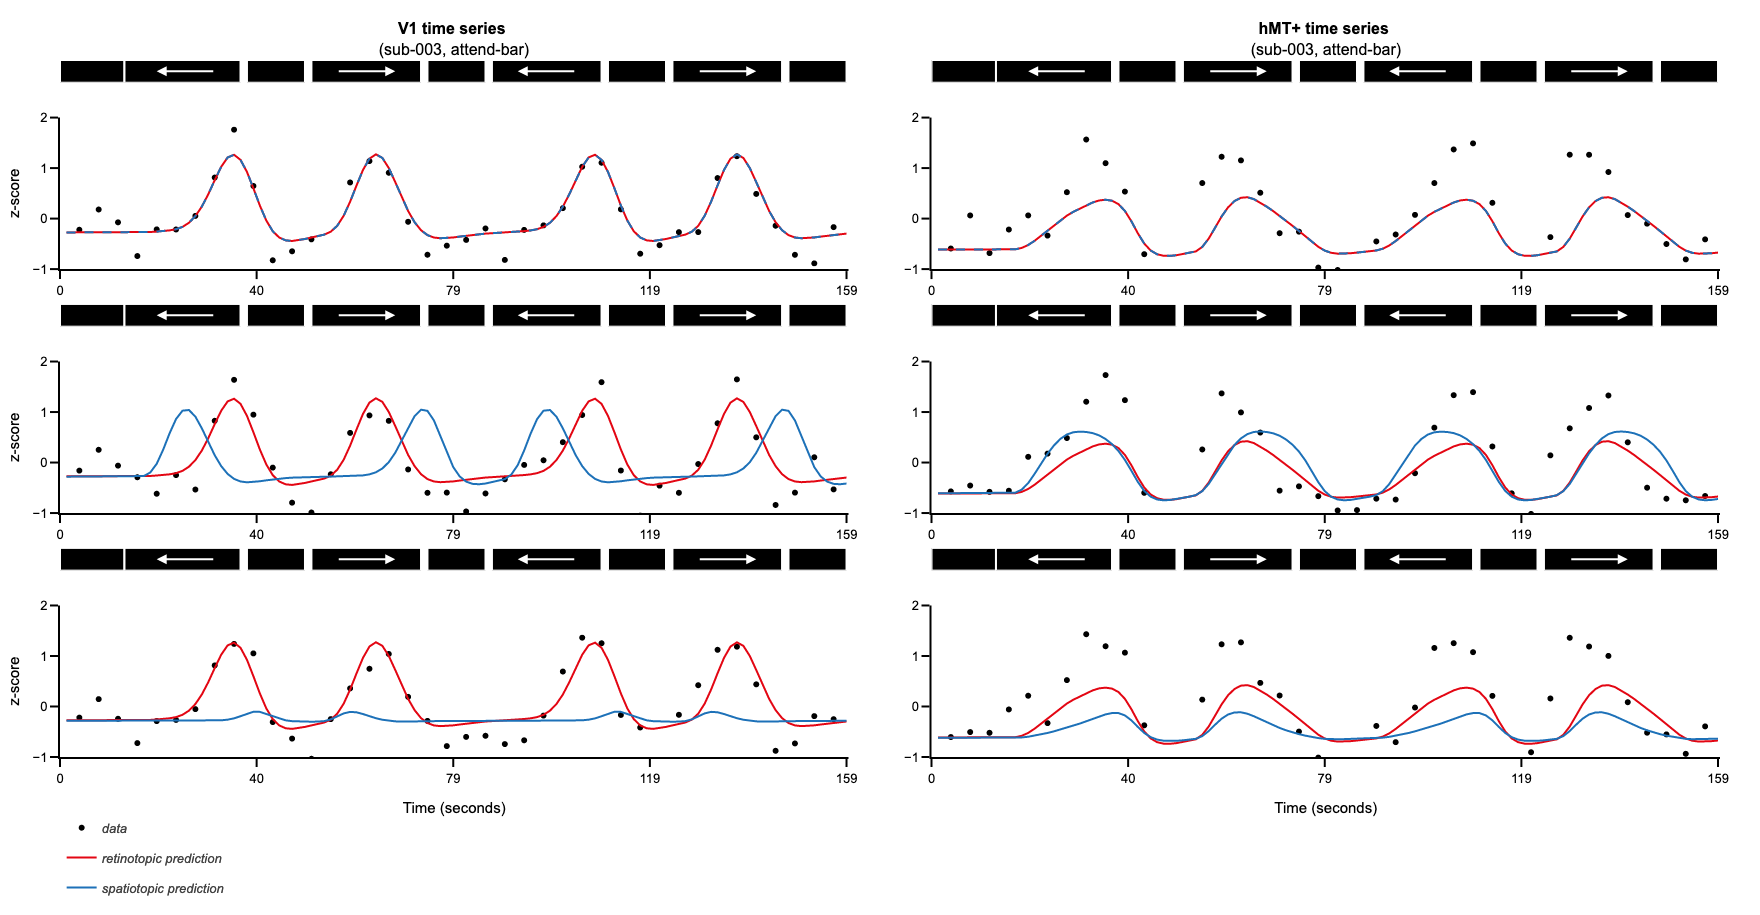

In [107]:
# Select data
v1_df = df.loc[(df.roi=='V1') & (df.r2>0.6) & (df.sd<1.5) & (df.x<-1.5)].reset_index()
num_vox = 3

hmt_df = df.loc[(df.roi=='hMT+') & (df.r2>0.5) & (df.x<-1.5) & (df.x>-5)].reset_index()
hmt_num_vox = 1

# get RF
gauss_fitter_fs = Iso2DGaussianFitter(data=model_fs_ts, 
                                      model=gauss_model_fs)
gauss_fitter_fs.grid_fit(ecc_grid=v1_df.ecc[num_vox], 
                         polar_grid=np.angle(v1_df.x[num_vox] + 1j * v1_df.y[num_vox]),
                         size_grid=v1_df.sd[num_vox])
gauss_model_fs.create_rfs()
rf = gauss_model_fs.grid_rfs[0,:,:]
rf_norm = ((rf - np.min(rf)) / (np.max(rf) - np.min(rf)))*255

# Subplot settings
rows, cols = 6, 2
margin_t, margin_b, margin_l, margin_r = 80, 90, 50, 50
fig_ratio = 5
ratio_fs_gaze = 159/195
fig_height = (1080/fig_ratio + (1080/fig_ratio*0.15))*rows/2 + margin_t + margin_b
fig_width = (1920*ratio_fs_gaze/fig_ratio)*cols + margin_l + margin_r
column_widths,row_heights = [1,1],[0.15,1,0.15,1,0.15,1]
sb_specs = [[{},{}],[{},{}],[{},{}],[{},{}],[{},{}],[{},{}]]
hover_data = 'Time: %{x:1.2f} s<br>' + 'z-score: %{y:1.2f}'

xaxis_range = [0,159]
yaxis_range = [-1,2]
yaxis_dtick = 1
x_tickvals = np.linspace(0,122,5)*TR
mot_1 = np.array([ 24*TR,  15*TR, 0.5, 0.5])
mot_2 = np.array([ 43*TR,  52*TR, 0.5, 0.5])
mot_3 = np.array([ 80*TR,  71*TR, 0.5, 0.5])
mot_4 = np.array([ 99*TR, 108*TR, 0.5, 0.5])
x0_all = np.array([0,10,29,39,57,67,85,95,113])*TR
x1_all = np.array([10,28,38,56,66,84,94,112,122])*TR
rolling = 3
data_col = 'rgba(0, 0, 0, 1)'
model_col = 'rgba(200, 0, 0, 1)'
retino_col = 'rgba(227, 6, 19, 1)'
spatio_col = 'rgba(29, 113, 184, 1)'
subplot_titles = ['<b>V1 time series </b><br>({}, attend-bar)'.format(subject2plot),
                  '<b>hMT+ time series </b><br>({}, attend-bar)'.format(subject2plot),
                  '','','','','','','','','','']

# create figure
fig = make_subplots(rows=rows, cols=cols, specs=sb_specs, print_grid=False, vertical_spacing=0.05, horizontal_spacing=0.05, 
                    column_widths=column_widths, row_heights=row_heights,  subplot_titles=subplot_titles)


# V1 gaze center
fig.append_trace(go.Scatter(x=np.array(pd.Series(v1_df.time_gc[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(v1_df.data_gc_ts[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=True, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=2, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gc_ts[v1_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=True, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=2, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gc_ts[v1_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=False, mode='lines', line_color=spatio_col, hovertemplate=hover_model, line_dash='dash',
                            line_width=2, opacity=1),row=2, col=1)

# V1 gaze left
fig.append_trace(go.Scatter(x=np.array(pd.Series(v1_df.time_gl[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(v1_df.data_gl_ts[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=False, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=4, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gl_retino_ts[v1_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=False, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=4, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gl_spatio_ts[v1_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=True, mode='lines', line_color=spatio_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=4, col=1)

# V1 gaze right
fig.append_trace(go.Scatter(x=np.array(pd.Series(v1_df.time_gr[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(v1_df.data_gr_ts[v1_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=False, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=6, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gr_retino_ts[v1_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=False, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=6, col=1)
fig.append_trace(go.Scatter(x=v1_df.time_fs[v1_num_vox], y=v1_df.model_fs2gr_spatio_ts[v1_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=False, mode='lines', line_color=spatio_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=6, col=1)

# hMT+ gaze center
fig.append_trace(go.Scatter(x=np.array(pd.Series(hmt_df.time_gc[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(hmt_df.data_gc_ts[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=False, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=2, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gc_ts[hmt_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=False, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=2, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gc_ts[hmt_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=False, mode='lines', line_color=spatio_col, hovertemplate=hover_model, line_dash='dash',
                            line_width=2, opacity=1),row=2, col=2)

# hMT+ gaze left
fig.append_trace(go.Scatter(x=np.array(pd.Series(hmt_df.time_gl[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(hmt_df.data_gl_ts[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=False, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=4, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gl_retino_ts[hmt_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=False, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=4, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gl_spatio_ts[hmt_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=False, mode='lines', line_color=spatio_col, hovertemplate=hover_model, 
                            line_width=2, opacity=1),row=4, col=2)

# hMT+ gaze right
fig.append_trace(go.Scatter(x=np.array(pd.Series(hmt_df.time_gr[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            y=np.array(pd.Series(hmt_df.data_gr_ts[hmt_num_vox]).rolling(window=rolling).mean())[::rolling],
                            name='<i>data<i>',legendgroup='data',
                            showlegend=False, mode='markers', marker_color=data_col, hovertemplate=hover_data,
                            line_width=0, opacity=1, marker_size=6),row=6, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gr_retino_ts[hmt_num_vox], 
                            name='<i>retinotopic prediction<i>',legendgroup='retino_model',
                            showlegend=False, mode='lines', line_color=retino_col, hovertemplate=hover_model,
                            line_width=2, opacity=1),row=6, col=2)
fig.append_trace(go.Scatter(x=hmt_df.time_fs[hmt_num_vox], y=hmt_df.model_fs2gr_spatio_ts[hmt_num_vox], 
                            name='<i>spatiotopic prediction<i>',legendgroup='spatio_model',
                            showlegend=False, mode='lines', line_color=spatio_col, hovertemplate=hover_model, 
                            line_width=2, opacity=1),row=6, col=2)

# Timeseries stim
xrefs = ['x','x2','x5','x6','x9','x10']
yrefs = ['y','y2','y5','y6','y9','y10']
axrefs = ['x','x2','x5','x6','x9','x10']
ayrefs = ['y','y2','y5','y6','y9','y10']

for xref,yref,axref,ayref in zip(xrefs, yrefs, axrefs, ayrefs):
    for x0,x1 in zip(x0_all,x1_all):
        fig.add_shape(type='rect', xref=xref, yref=yref, x0=x0, y0=0, x1=x1, y1=1, 
                      line_width=2, fillcolor='black', line_color='white')
    for [coord_tp] in zip([mot_1, mot_2, mot_3, mot_4]):
        fig.add_annotation(ax=coord_tp[0], x=coord_tp[1], ay=coord_tp[2], y=coord_tp[3], 
                           xref=xref, yref=yref, axref=axref,ayref=ayref,
                           text='', showarrow=True, arrowhead=2, arrowcolor='white')

# # set axis
for row in np.arange(rows):
    for col in np.arange(cols):
        fig.update_xaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)
        fig.update_yaxes(visible=True, ticklen=8, linewidth=template_specs['axes_width'], row=row+1, col=col+1)

fig.layout.update(# time stim axis
                  xaxis_range=xaxis_range, xaxis_title='',     xaxis2_range=xaxis_range, xaxis2_title='', 
                  xaxis_visible=False, yaxis_visible=False,    xaxis2_visible=False, yaxis2_visible=False,
                  yaxis_range=[0,1], yaxis_title='',           yaxis2_range=[0,1], yaxis2_title='',
                  xaxis5_range=xaxis_range, xaxis5_title='',   xaxis6_range=xaxis_range, xaxis6_title='', 
                  xaxis5_visible=False, yaxis5_visible=False,  xaxis6_visible=False, yaxis6_visible=False,
                  yaxis5_range=[0,1], yaxis5_title='',         yaxis6_range=[0,1], yaxis6_title='',
                  xaxis9_range=xaxis_range, xaxis9_title='',   xaxis10_range=xaxis_range, xaxis10_title='', 
                  xaxis9_visible=False, yaxis9_visible=False,  xaxis10_visible=False, yaxis10_visible=False,
                  yaxis9_range=[0,1], yaxis9_title='',         yaxis10_range=[0,1], yaxis10_title='',
 
                  # time series axis
                  xaxis3_tickvals=x_tickvals, xaxis3_ticktext=np.round(x_tickvals),               xaxis4_tickvals=x_tickvals, xaxis4_ticktext=np.round(x_tickvals),
                  xaxis3_range=xaxis_range, xaxis3_title='',                                      xaxis4_range=xaxis_range, xaxis4_title='',
                  yaxis3_range=yaxis_range, yaxis3_title='z-score',yaxis3_dtick=yaxis_dtick,      yaxis4_range=yaxis_range, yaxis4_title='', yaxis4_dtick=yaxis_dtick,
                  xaxis7_tickvals=x_tickvals, xaxis7_ticktext=np.round(x_tickvals),               xaxis8_tickvals=x_tickvals, xaxis8_ticktext=np.round(x_tickvals),
                  xaxis7_range=xaxis_range, xaxis7_title='',                                      xaxis8_range=xaxis_range, xaxis8_title='',
                  yaxis7_range=yaxis_range, yaxis7_title='z-score', yaxis7_dtick=yaxis_dtick,     yaxis8_range=yaxis_range, yaxis8_title='', yaxis8_dtick=yaxis_dtick,                  
                  xaxis11_tickvals=x_tickvals, xaxis11_ticktext=np.round(x_tickvals),             xaxis12_tickvals=x_tickvals, xaxis12_ticktext=np.round(x_tickvals),
                  xaxis11_range=xaxis_range, xaxis11_title='Time (seconds)',                      xaxis12_range=xaxis_range, xaxis12_title='Time (seconds)',
                  yaxis11_range=yaxis_range, yaxis11_title='z-score', yaxis11_dtick=yaxis_dtick,  yaxis12_range=yaxis_range, yaxis12_title='', yaxis12_dtick=yaxis_dtick,
                  
                  # general settings
                  template=fig_template, width=fig_width, height=fig_height,
                  margin_l=margin_l+10, margin_r=margin_r-10, margin_t=margin_t-20, margin_b=margin_b+20,
                  legend_yanchor='top', legend_y=-0.08, legend_xanchor='left', 
                  legend_x=0.001, legend_bgcolor='rgba(255,255,255,0)')
        
fig.show(config={"displayModeBar": False})
# fig.write_image("{}/{}_{}-timeseries.pdf".format(tsv_dir, subject2plot, roi2plot))
# fig.write_html("{}/{}_{}-timeseries.html".format(tsv_dir, subject2plot, roi2plot),config={"displayModeBar": False})